In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('student_per.csv')
dataset.head(6)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
5,6,13.4,65.1,5.0,97.5,A


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               998 non-null    int64  
 1   weekly_self_study_hours  998 non-null    float64
 2   attendance_percentage    998 non-null    float64
 3   class_participation      998 non-null    float64
 4   total_score              998 non-null    float64
 5   grade                    998 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 46.9+ KB


In [5]:
dataset.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,998.000000,998.000000,998.000000,998.000000,998.000000
mean,499.500000,15.159519,84.712525,5.972545,84.732265
std,288.242086,6.789205,9.364931,1.908968,15.064447
min,1.000000,0.000000,50.000000,0.000000,33.800000
25%,250.250000,10.425000,78.200000,4.700000,74.400000
50%,499.500000,15.200000,85.000000,6.000000,88.200000
75%,748.750000,19.500000,91.700000,7.200000,100.000000
max,998.000000,40.000000,100.000000,10.000000,100.000000


check outlier present in the data

C:\Users\Acer\AppData\Local\Temp\ipykernel_4876\1567454725.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['attendance_percentage'])


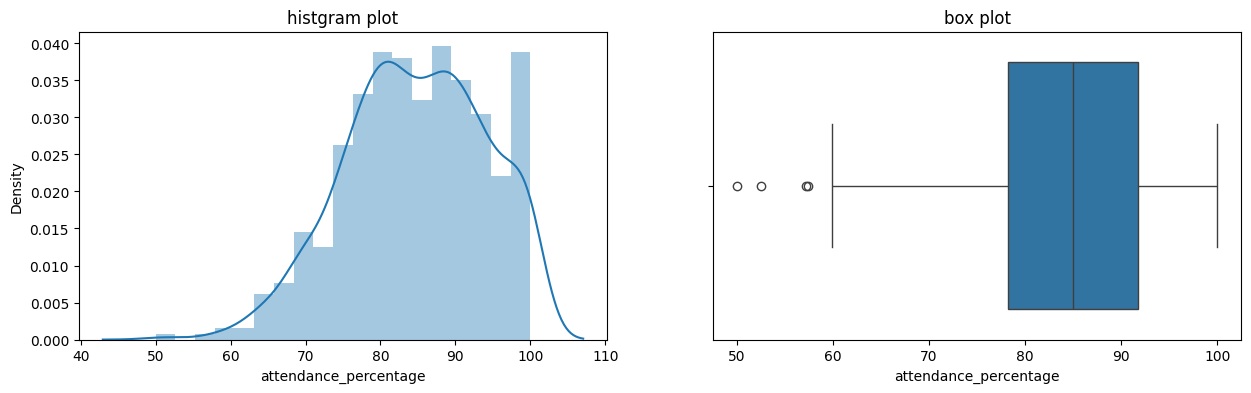

In [6]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('histgram plot')
sns.distplot(dataset['attendance_percentage'])
plt.subplot(1,2,2)
plt.title('box plot')
sns.boxplot(x='attendance_percentage',data= dataset)
plt.show()

In [7]:
from sklearn.preprocessing import FunctionTransformer

In [8]:
ft = FunctionTransformer(func = np.log1p)
ft.fit(dataset[['attendance_percentage']])

,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<ufunc 'log1p'>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to func... versionadded:: 0.18",None
,"inv_kw_args inv_kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to inverse_func... versionadded:: 0.18",None


In [9]:
ft.transform(dataset[['attendance_percentage']])

,attendance_percentage
0,4.570579
1,4.394449
2,4.469350
3,4.265493
4,4.417635
...,...
993,4.364372
994,4.553877
995,4.297285
996,4.542230


In [10]:
dataset['attendance_percentage_ft'] = ft.transform(dataset[['attendance_percentage']])
dataset.head(7)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade,attendance_percentage_ft
0,1,18.5,95.6,3.8,97.9,A,4.570579
1,2,14.0,80.0,2.5,83.9,B,4.394449
2,3,19.5,86.3,5.3,100.0,A,4.469350
3,4,25.7,70.2,7.0,100.0,A,4.265493
4,5,13.4,81.9,6.9,92.0,A,4.417635
5,6,13.4,65.1,5.0,97.5,A,4.191169
6,7,26.1,81.8,5.9,100.0,A,4.416428


C:\Users\Acer\AppData\Local\Temp\ipykernel_4876\968588924.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['attendance_percentage'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_4876\968588924.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['attendance_percentage_ft'])


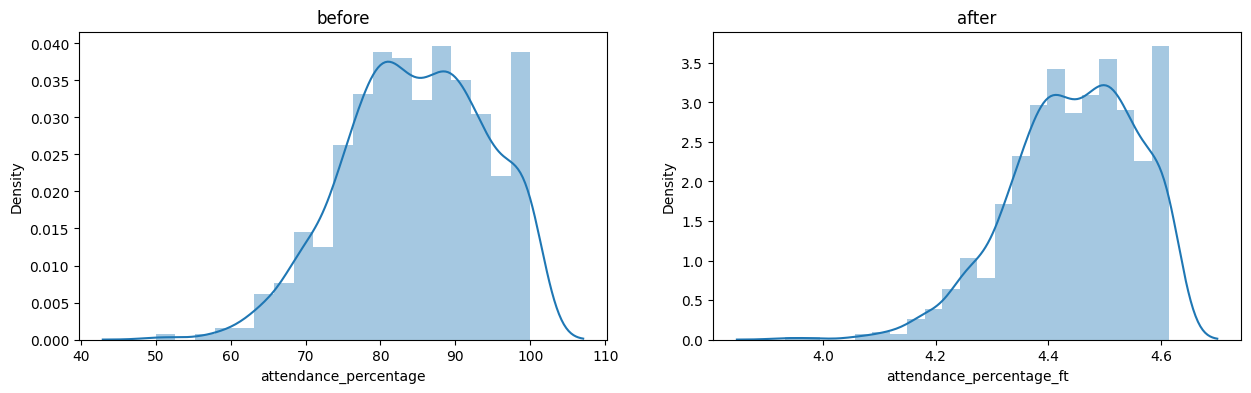

In [11]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(dataset['attendance_percentage'])
plt.subplot(1,2,2)
plt.title('after')
sns.distplot(dataset['attendance_percentage_ft'])
plt.show()